In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [192]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [193]:
# Retrieving the number of rows and columns in the dataframe
df.shape

(2443651, 9)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [195]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [197]:
# 1. Create a crosstab between the product category and the isBestSeller status.


crosstab_result = pd.crosstab(df['category'],df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [198]:
# 2. Are there categories where being a best-seller is more prevalent?
# Hint: one option is to calculate the proportion of best-sellers for each category
#and then sort the categories based on this proportion in descending order.

#Group by category and aggregate count and sum of isBestSeller
category_count = df.groupby('category')['isBestSeller'].agg(['count','sum'])

#Calculate the proportion of best-sellers in each category
category_count['Proportion']= category_count['sum']/category_count['count']

#Sort categories based on the proportion of best-sellers in descending order
proportion_sorted = category_count['Proportion'].sort_values(ascending =False)
proportion_sorted


category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Name: Proportion, Length: 296, dtype: float64

In [199]:
#Statistical Tests:

#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.


from scipy.stats import chi2_contingency

# Chi-square test for 'isBestSeller' and 'category'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

Conclusion
the p-value is 0.0:

Reject the null hypothesis: The null hypothesis states that the distribution of best-seller status is independent of the product category. Since the p-value is extremely small, reject the null hypothesis.

In [201]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.

from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

The Cramér's V value of 0.122 suggests a weak association between the two variables. Though statistically significant, the strength of this relationship is not very strong in practical terms.

Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

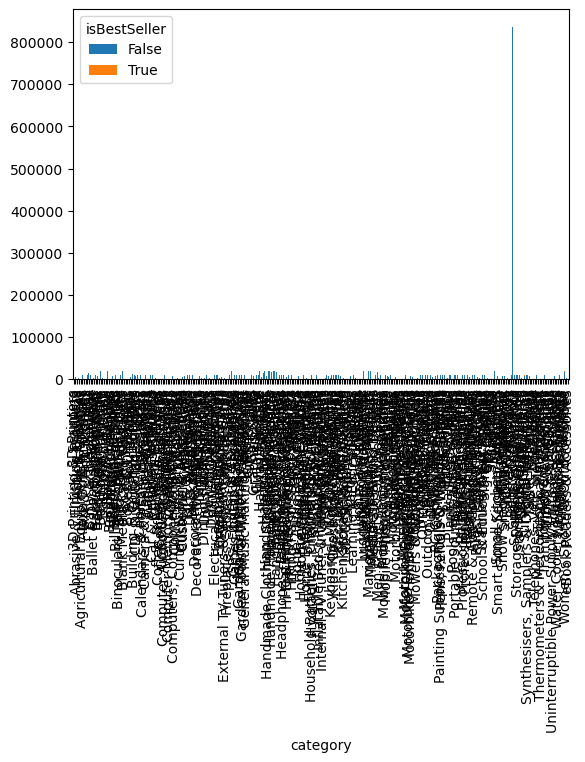

In [204]:
# Plotting the stacked bar chart

crosstab_result.plot(kind="bar", stacked=True)


Since we have more categories all the names are overlapping

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.



In [207]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

In [208]:
data_series = df['price'] # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)
df.iloc[~outliers.index,:] # ~ = NOT

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443640,2828581,B0BX2KM9KQ,Motorcycle Socks 2 Pairs I'd Rather be on My M...,0.0,0,10.99,False,0,Motorbike Clothing
2443631,2828572,B01N1GW57Z,WULFSPORT LINEAR MOTORBIKE KIDS RACE SUIT New ...,5.0,4,60.62,False,0,Motorbike Clothing
2443625,2828566,B095K5HFZ7,SHIMA SX-2 EVO LADY Motorbike Shoes for Women ...,4.6,170,99.95,False,0,Motorbike Clothing
2443622,2828563,6040458925,starlingukpk Quality Flexible Motorbike Motorc...,4.2,2,9.99,False,0,Motorbike Clothing
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
...,...,...,...,...,...,...,...,...,...
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
23,24,B09HGRXXTM,JBL Flip 6 Portable Bluetooth Speaker with 2-w...,4.7,8700,98.95,False,0,Hi-Fi Speakers
12,13,B09ZXDMNCY,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13432\1518979486.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20, x='category', y='price', palette='viridis')


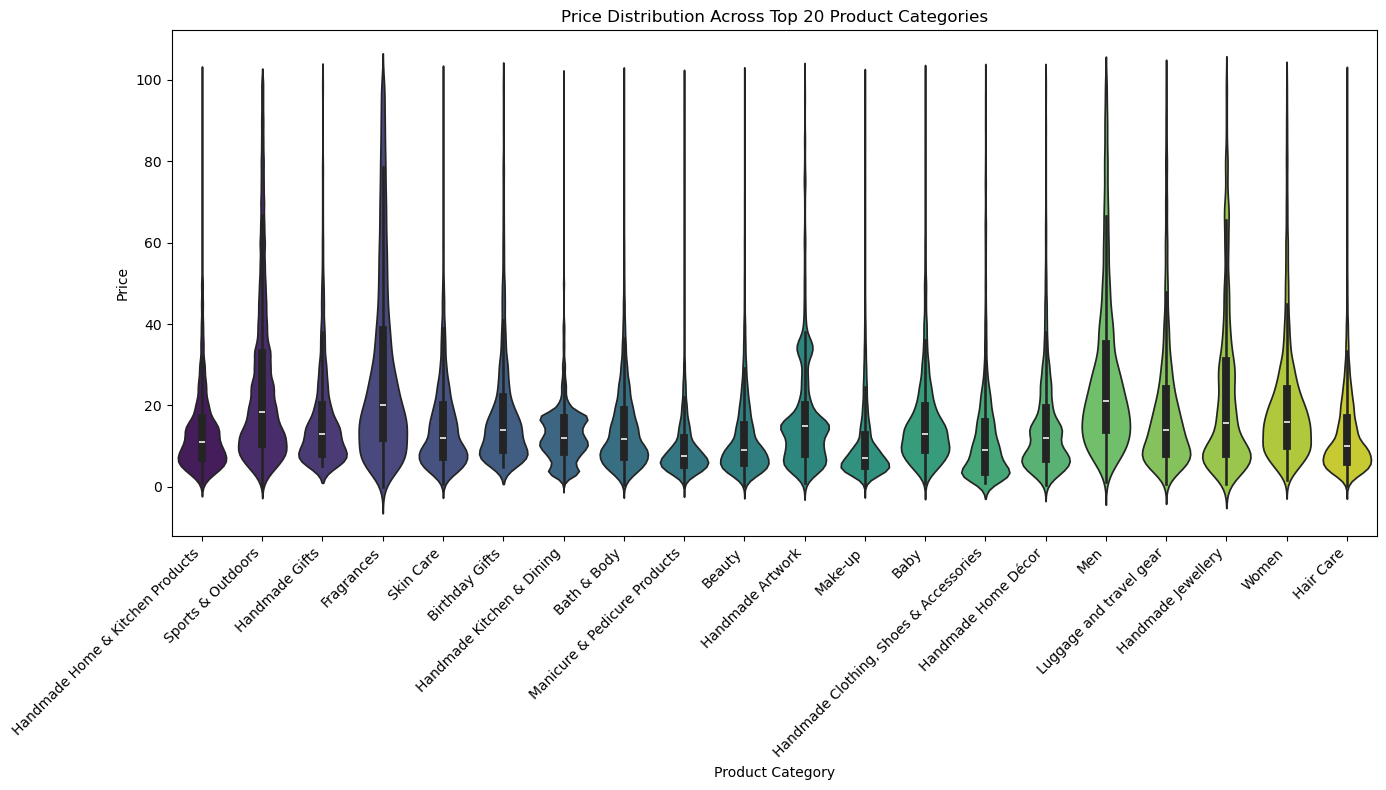

In [210]:
# Assume df_clean is your DataFrame after removing outliers
# Calculate the count of each category
category_counts = df_clean['category'].value_counts()

# Get the top 20 categories
top_20_categories = category_counts.nlargest(20).index

# Filter the DataFrame to include only the top 20 categories
df_top_20 = df_clean[df_clean['category'].isin(top_20_categories)]

# Create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top_20, x='category', y='price', palette='viridis')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Price Distribution Across Top 20 Product Categories')
plt.tight_layout()
plt.show()

Which product category tends to have the highest median price? Don't filter here by top categories.

In [212]:
# Calculate the median price for each category
median_price_by_category = df_clean.groupby('category')['price'].median().reset_index()

# Display the median prices
print(median_price_by_category)

# Find the category with the highest median price
highest_median_category = median_price_by_category.loc[median_price_by_category['price'].idxmax()]

# Display the result
print("Category with the highest median price:")
print(highest_median_category)


                           category   price
0                       3D Printers  52.195
1            3D Printing & Scanning  28.580
2     Abrasive & Finishing Products  10.150
3                    Action Cameras  33.135
4                          Adapters   7.050
..                              ...     ...
291                Wind Instruments  13.470
292               Window Treatments  17.990
293                           Women  15.990
294  Women's Sports & Outdoor Shoes  45.990
295     eBook Readers & Accessories  21.990

[296 rows x 2 columns]
Category with the highest median price:
category    Desktop PCs
price              74.0
Name: 75, dtype: object


Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

,category,price
16,Bath & Body,14.678683
20,Beauty,12.523480
29,Birthday Gifts,18.600195
111,Hair Care,13.461408
116,"Handmade Clothing, Shoes & Accessories",12.958639
117,Handmade Gifts,17.395112
176,Make-up,10.612918
177,Manicure & Pedicure Products,10.231825
251,Skin Care,15.654722
262,Sports & Outdoors,25.172065


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13432\3650538856.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_prices_top_10, x='category', y='price', palette="coolwarm")


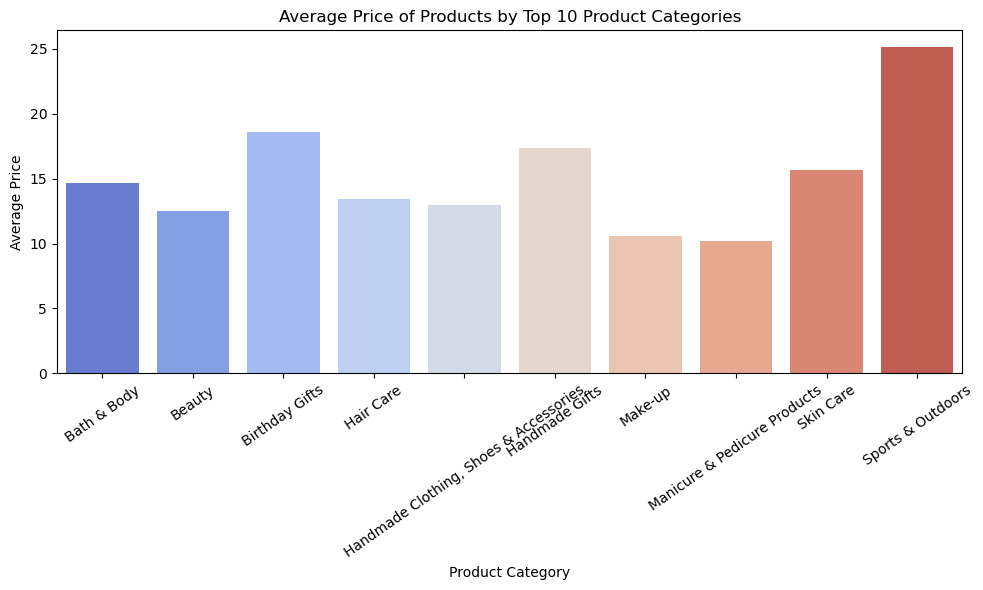

In [241]:
#  Calculate the average price of products for each category
average_prices = df_clean.groupby('category')['price'].mean().reset_index()

#  Identify the top 10 categories based on count
top_10_categories = df_clean['category'].value_counts().nlargest(10).index

# Filter the average_prices DataFrame to include only the top 10 categories
average_prices_top_10 = average_prices[average_prices['category'].isin(top_10_categories)]
display(average_prices_top_10)
#  Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_prices_top_10, x='category', y='price', palette="coolwarm")
plt.title('Average Price of Products by Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()


Which product category commands the highest average price? Don't filter here by top categories.

In [269]:
#  Calculate the highest average price of products for each category
average_prices = df_clean.groupby('category')['price'].mean().reset_index()
average_price_sorted = average_prices.sort_values(by ='price',ascending=False)
average_price_sorted


,category,price
190,Motherboards,68.772432
34,Boxing Shoes,67.417803
75,Desktop PCs,66.915562
274,Tablets,66.552971
108,Graphics Cards,65.103509
...,...,...
22,Bedding Accessories,8.835220
4,Adapters,8.750197
246,Signs & Plaques,8.210513
8,Arts & Crafts,8.006540


Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13432\520556317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x='category', y='stars', palette='coolwarm')


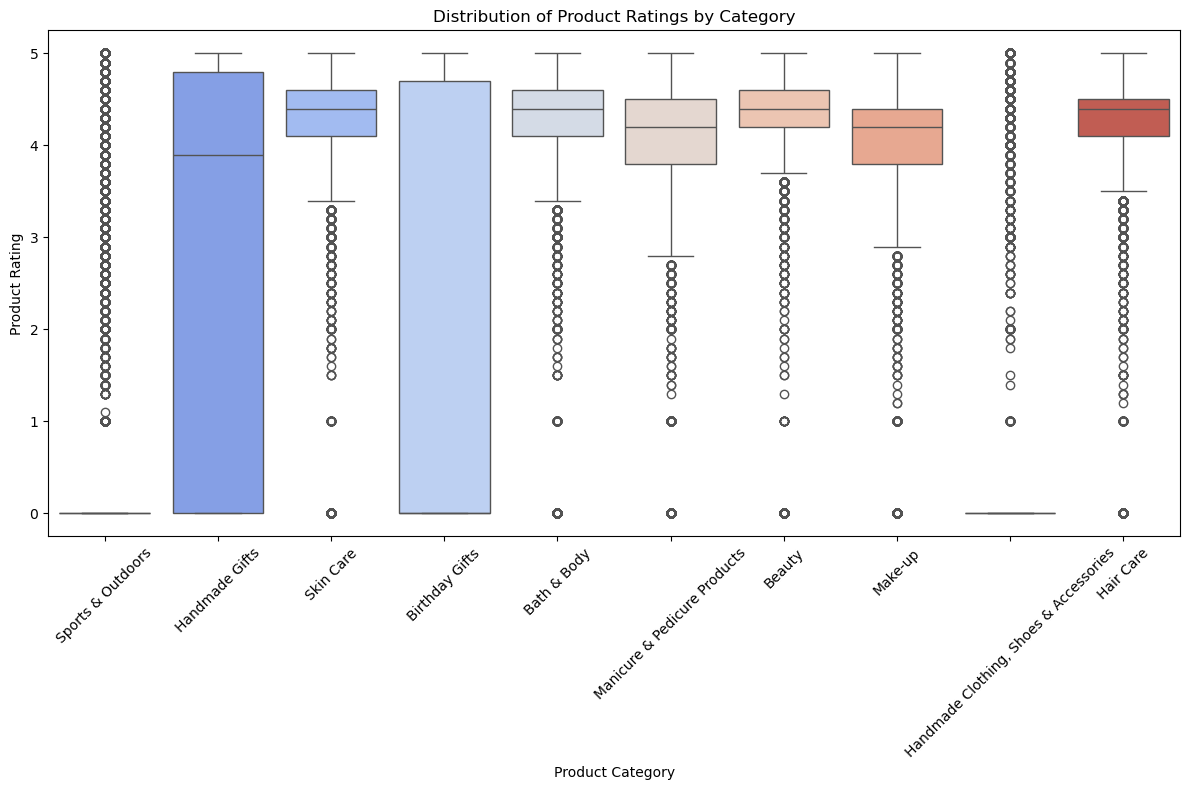

In [275]:
# Identify the top 10 categories based on count
top_10_categories = df_clean['category'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
df_top_10 = df_clean[df_clean['category'].isin(top_10_categories)]

# Create side-by-side box plots using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_10, x='category', y='stars', palette='coolwarm')
plt.title('Distribution of Product Ratings by Category')
plt.xlabel('Product Category')
plt.ylabel('Product Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [285]:
# calculate the highest median rating from customers
median_rating = df_clean.groupby('category')['stars'].median().reset_index()
median_rating_sorted = median_rating.sort_values(by ='stars',ascending=False)
median_rating_sorted


,category,stars
56,Computer Memory,4.7
36,Building & Construction Toys,4.6
209,Office Paper Products,4.6
174,Luxury Food & Drink,4.6
157,Kids' Play Figures,4.6
...,...,...
133,Hockey Shoes,0.0
129,Hi-Fi Receivers & Separates,0.0
121,Handmade Kitchen & Dining,0.0
120,Handmade Jewellery,0.0


Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.

In [287]:
# Calculating the Pearson(linear) correlation coefficient between 'stars' and 'price' columns
# here corelation can be positive and negative 
correlation = df['stars'].corr(df['price'])
correlation

-0.12490673262148609

In [291]:
# Calculating the Spearman(relationship might not be linear) rank correlation between 'stars' and 'price'
correlation = df['stars'].corr(df['price'], method='spearman')
correlation

-0.1331642546243379

Is there a significant correlation between product price and its rating?
Answer : Here correlation is negative.
The Pearson correlation of (-0.1249) suggests a weak relationship between the stars and price of the product. 
The Spearman correlation of (-0.1331) indicates a weak monotonic relationship between the two variables.

Conclusion that the correlation is weak and negative is accurate.

Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

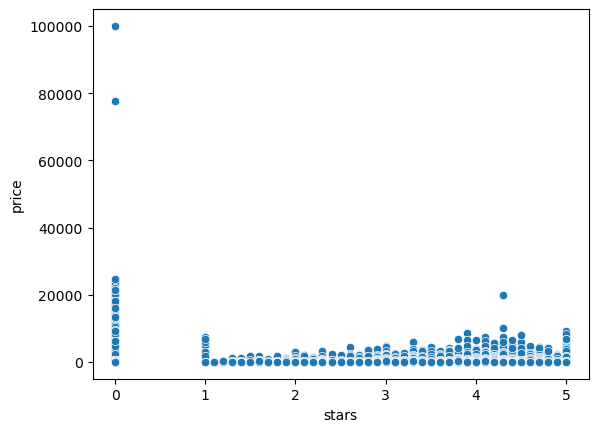

In [293]:
# Plotting a scatter plot to visualize the relationship between 'stars' and 'price'
sns.scatterplot(data=df, x='stars', y='price');

The positive correlation suggests that higher-priced products tend to have better ratings in this dataset. 

Use a correlation heatmap to visualize correlations between all numerical variables.

In [307]:
# Removing the "Id" column from the dataframe
df.drop("uid", inplace=True, axis=1)

In [309]:
# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number")

In [311]:
# Calculating the Spearman correlation coefficients between 'SalePrice' and all other numerical variables
spearman_correlations = df_numerical.corrwith(df['price'], method='spearman')

# Sorting the correlations for better visualization
spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)

# Displaying the correlations
spearman_correlations_sorted

price                1.000000
stars               -0.133164
reviews             -0.148690
boughtInLastMonth   -0.198937
dtype: float64

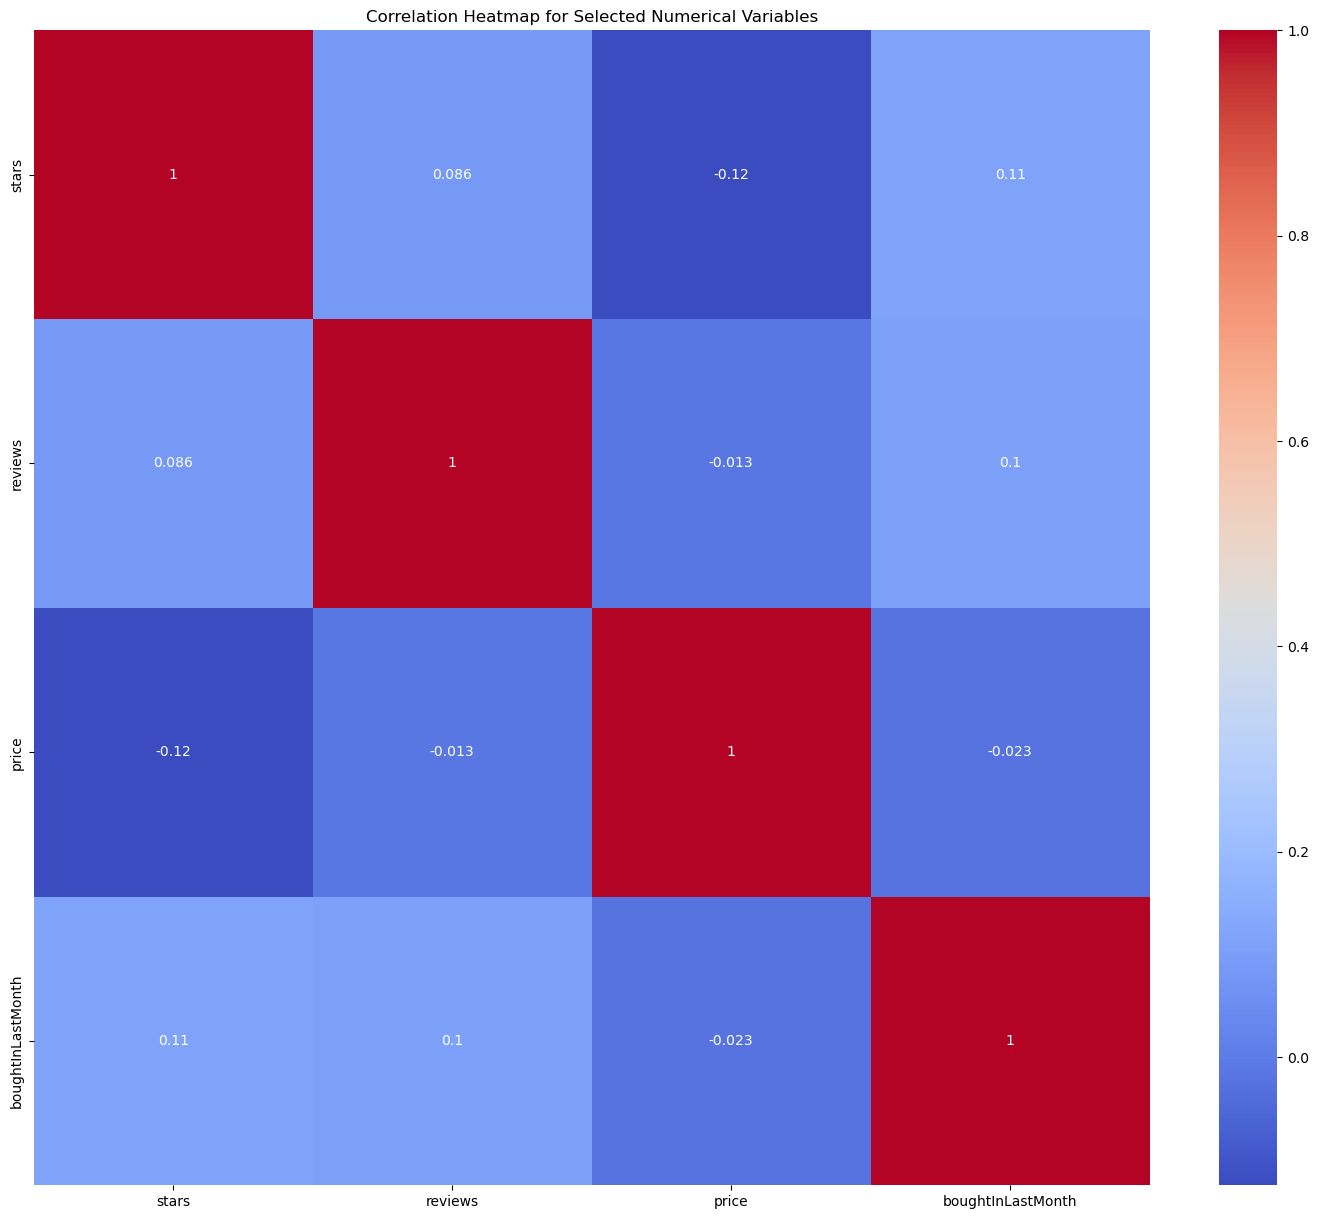

In [313]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

Examine if product prices typically follow a normal distribution using a QQ plot.

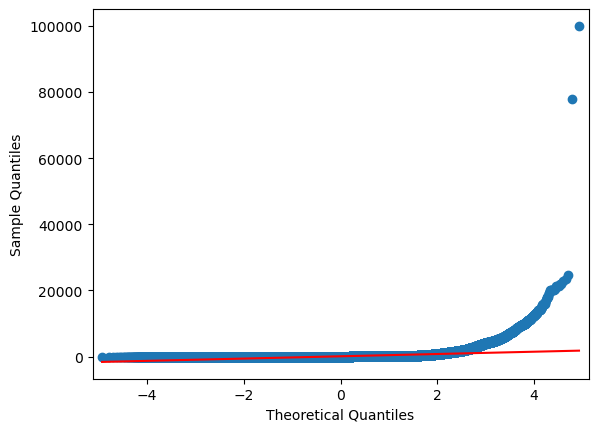

In [316]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');

The significant deviations from the straight diagonal line across the price range  suggest that the product prices do not follow a normal distribution.